**DOMAIN:** Automatic Ticketing System.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**CONTEXT:** One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT
leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT
service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is
to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no
business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit
in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The
assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is
time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out
ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result
in user satisfaction deterioration / poor customer service.

**Business Domain Value:** In the support process, incoming incidents are analysed and assessed by organisations support teams to
fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in
substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT
Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket
categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2
teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and
Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3
teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if
vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard
Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before
ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to
L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents
getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed
for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed
timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

**Pre-Processing, Data Visualisation and EDA**
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualising different patterns
- Visualising different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

# Pre-Processing, Data Visualisation and EDA

In [ ]:
#load required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#add to remove warning for python 3.6 dependency
import warnings
import string 
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

# Pre-Processing, Data Visualisation and EDA

## Exploring the given Data files 

In [ ]:
#Load data to dataframe 
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

In [ ]:
data.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0  
5            GRP_0  
6            GRP_1  
7            GRP_0  
8            GRP_0  
9            GRP_0

In [ ]:
# Observations from first look
# 4 Columns Short Desription Description Caller Assignment 
# Questions to be answered 
# Would classification of data depend on caller i.e. is there a caller that raises ticken only in certain category ?
# Name of callers looks masked so that they cannot be identified not sure how much information can be captured from that
# Lot of cleanup required in Description column

# Understanding the structure of data 

In [ ]:
data.shape
#There are 8500 rows & 4 Columns

(8500, 4)

In [ ]:
data.info()
#Short description , Description have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
data.describe(include='all').T

count unique                top  freq
Short description  8492   7481     password reset    38
Description        8499   7817                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

### Notes
#### Not much data is missing for short description and desciption. Will see if a cobination of short description + description solve null value issue. To beign with will replace null value with  ' ' 
#### Maximum unique tickets are for password reset. There will be more will see how many password reset tickets are there after we have done Term Frequency analysis and removed words that add little or no information 
#### 50% tickets are for GRP_0 will try to see that types of tickets are getting assigned to GRP_0 and why ?
#### One tenth of the tickets are being created by caller "bpctwhsn kzqsbmtp" it would be good to see if there is a pattern for its tickets e.g. are they system generated tickets etc
#### In 56 cases description only contains the word the, it looks like for these tickets short description will have all the information required to resolve the issues. Hence we may have to see if both short desciption + description has to be joined as one string to do the analysis

## Missing points in data 

In [ ]:
#1. Handle the null values in data 

In [ ]:
data.isnull().sum()
#missing values in the dataset, within 'Short decription' and 'Description' columns, 

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
data[pd.isnull(data).any(axis=1)]
#Null Values

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [ ]:
# Null Values in Description and Short Description columns looks mutually exclusive 
# i.e. when description is present Short Description is not present and vice versa. 
# Let's replace null values with ' ' so that later we can combine both columns short description 
# and description to do NLP

In [ ]:
data.fillna(" ", inplace = True)

In [ ]:
data.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# No Null Values left in data

# Finding inconsistencies in the data 

### We will see data if there is 


#### Unbalanced Data

#### Data from differnt sources not represented properly

#### Differnt Origin/Language


In [ ]:
# Looking at unbalanced data

In [ ]:
data['Assignment group'].nunique()
#74 Unique Assignment group

74

In [ ]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

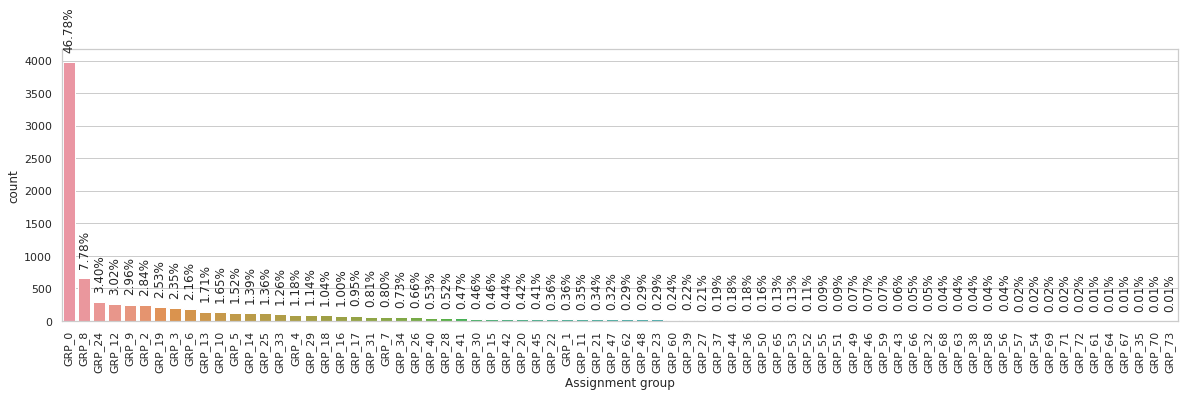

In [ ]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
#### There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2 incidents, 
#### need to see if we can drop those rows due to the lack of samples representing those classes. 
#### They might not be of much help as a predictor

In [ ]:
# view the top 20 Assignment groups with highest number of ticket
df_top_20 = data['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

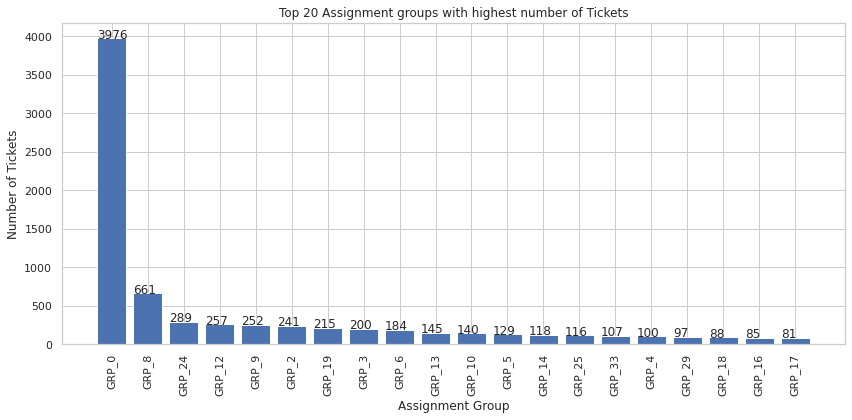

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [ ]:
df_inc = data['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

index  Assignment group  percentage
0   GRP_0              3976   46.776471
1   GRP_8               661    7.776471
2  GRP_24               289    3.400000
3  GRP_12               257    3.023529
4   GRP_9               252    2.964706

In [ ]:
#Distribute tickets into bins
df_bins = pd.DataFrame(columns=['Description','Ticket Count'], dtype=object)
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

Description Ticket Count
0        1 ticket            6
1      2-5 ticket           13
2     6-10 ticket            6
3    11-20 ticket            9
4    21-50 ticket           16
5   51-100 ticket            9
6     >100 ticket           15

In [ ]:
#view the bottom 20 Assignment groups with less number of tickets
df_bottom_20 = data['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

index  Assignment group
0   GRP_61                 1
1   GRP_64                 1
2   GRP_67                 1
3   GRP_35                 1
4   GRP_70                 1
5   GRP_73                 1
6   GRP_57                 2
7   GRP_54                 2
8   GRP_69                 2
9   GRP_71                 2
10  GRP_72                 2
11  GRP_68                 3
12  GRP_63                 3
13  GRP_38                 3
14  GRP_58                 3
15  GRP_56                 3
16  GRP_66                 4
17  GRP_32                 4
18  GRP_43                 5
19  GRP_49                 6

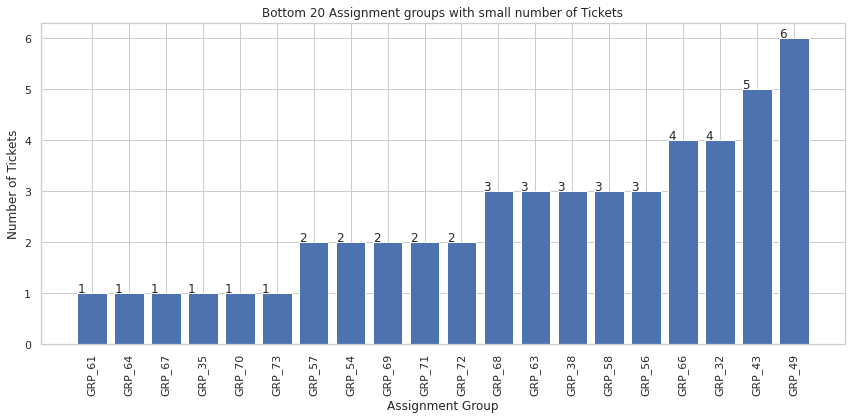

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

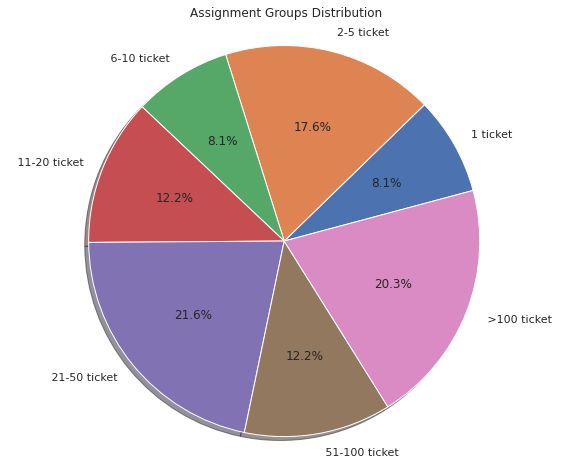

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

#### There are 6 Assignment Group’s for which just have 1 ticket in the dataset
#### There are 15 Assignment group’s which have more than 100 tickets.
#### Only 20% of the Assignment groups have greater than 100 tickets.

#### Note : Data is unbalanced for certain classes, while modelling we will see how to use algorithms like boosting  and bagging to balance the data also where data set is very small for classification we will not model those groups. 

In [ ]:
# Frequent Caller Analysis

In [ ]:
pd.set_option('display.max_rows', None)
data['Caller'].value_counts()

bpctwhsn kzqsbmtp                 810
ZkBogxib QsEJzdZO                 151
fumkcsji sarmtlhy                 134
rbozivdq gmlhrtvp                  87
rkupnshb gsmzfojw                  71
jloygrwh acvztedi                  64
spxqmiry zpwgoqju                  63
oldrctiu bxurpsyi                  57
olckhmvx pcqobjnd                  54
jyoqwxhz clhxsoqy                  51
dkmcfreg anwmfvlg                  51
efbwiadp dicafxhv                  45
afkstcev utbnkyop                  32
gzhapcld fdigznbk                  30
mnlazfsr mtqrkhnx                  28
uvrbhlnt bjrmalzi                  27
entuakhp xrnhtdmk                  25
vzqomdgt jwoqbuml                  24
jionmpsf wnkpzcmv                  24
bozdftwx smylqejw                  23
utyeofsk rdyzpwhi                  21
qasdhyzm yuglsrwx                  21
rxoynvgi ntgdsehl                  21
vbwszcqn nlbqsuyv                  19
hbmwlprq ilfvyodx                  17
ugyothfz ugrmkdhx                  17
niptbwdq cse

In [ ]:
#See if any caller rasied ricket only in any specific group
data['Caller'].groupby(data['Assignment group']).value_counts().nlargest(10)

Assignment group  Caller           
GRP_8             bpctwhsn kzqsbmtp    362
GRP_9             bpctwhsn kzqsbmtp    153
GRP_0             fumkcsji sarmtlhy    132
GRP_5             bpctwhsn kzqsbmtp     96
GRP_6             bpctwhsn kzqsbmtp     89
GRP_0             rbozivdq gmlhrtvp     86
GRP_10            bpctwhsn kzqsbmtp     60
GRP_0             olckhmvx pcqobjnd     54
GRP_8             ZkBogxib QsEJzdZO     54
GRP_0             efbwiadp dicafxhv     45
Name: Caller, dtype: int64

### Notes: 
#### fumkcsji sarmtlhy has rasied 134 tickets and 132 tickets out of it have been in Group0
#### rbozivdq gmlhrtvp has rasied 87 tickets and 86 of it is in GRP_0
#### olckhmvx pcqobjnd has raised 54 ticekts and all 54 are in GRP_0

In [ ]:
# Finding if data has issues while getting captured from differnt sources

In [ ]:
data.tail(10)

Short description  \
8490                         check status in purchasing   
8491                                     vpn for laptop   
8492                 hr_tool etime option not visitble    
8493           erp fi  - ob09, two accounts to be added   
8494  tablet needs reimaged due to multiple issues w...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8490  please contact ed pasgryowski (pasgryo) about ...  mpihysnw wrctgoan   
8491  \n\nreceived from: jxgobwrm.qkugdipo@gmail.com...  jxgobwrm qkugdipo   
8492                 hr_tool etime option not visitble   tmopbken ibzougsd   
8493  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8490           GRP_29  
8491           GRP_34  
8492            GRP_0  
8493           GRP_10  
8494            GRP_3  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [ ]:
# There is lot of garbled text. we guess that its happend because while capturing the data from web UTF to ASCII
# conversion may have happned introducing "curly quotes" i.e. mojibreaks  Cleaning the same. 
!pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.1 MB/s 


In [ ]:
#Checking if ftfy is able to solve the problem
from ftfy import fix_encoding, fix_text, badness
fix_text('machine nÃ£o estÃ¡ funcionando')

'machine não está funcionando'

In [ ]:
# Applying the fix on Short Description and Description so that data from differnt sources do not have inconsitency
data['Short description'] = data['Short description'].apply(fix_text)
data['Description'] = data['Description'].apply(fix_text)

In [ ]:
# Visually checking the removal of mojibreaks
data

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Visual inspection of data also shows presence of other langauge. Which may give rise to incorrect classification 
# of tickets. We will analyse the number of langauges and translate them to English

In [ ]:
# Combining Short Description and Description so that Langauge detection and translation is quicker 
def combineText(ShortDesc , Desc):
  finaltext = ""
  
  if ShortDesc == Desc:
    finaltext = Desc
  else:
    finaltext = ShortDesc + " " + Desc
  
  return  finaltext

In [ ]:
#combine Short description and Description
# apply function
data['Ticket'] = data.apply(lambda x: combineText(x['Short description'], x['Description']), axis=1)

In [ ]:
data

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# However before we are able to properly do lang detect. We will have to do clean-up of text so that 
# there are minimal special chacters left in the text
# lower the text , remove special character, remove names, remove emails
callers = data['Caller'].str.lower().unique()
def clean_text_before_lang_detect(text  ):
    #remove caller name from text
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
    #remove _x000D_
    text = re.sub(r'_x000D_', '',text)
    #remove tabs
    text = re.sub(r'\t', '',text)
    #remove puntuations
    text = text.translate(str.maketrans('','',string.punctuation))
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    #Remove leading & trailing Spaces
    text = re.sub(r"^\s+|\s+$", "", text)
    # Remove numbers and special chaacters
    text = re.sub(r'\d+','' ,text)
    text = re.sub(r'\/\/',' ', text)
    text = re.sub(r'\\',' ', text)
    text = re.sub(r'\(',' ', text)
    text = re.sub(r'\)',' ', text)
    text = re.sub(r':' ,' ', text)
    text = re.sub(r'-' ,' ', text)
    text = re.sub(r'\/',' ', text)
    text = re.sub(r'\.',' ', text)
    text = re.sub(r'\,',' ', text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #remove '_'
    text = re.sub(r'_',' ',text)
    #remove additional spaces 
    text = re.sub(' +', ' ', text)
    text=text.lower()
    text = text.strip()
    return text

In [ ]:
data['Ticket'] = data['Ticket'].apply(clean_text_before_lang_detect)

In [ ]:
data

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=33ff0778b657b3a9ede28a5be759040f5c11f74a1f398d9dc395cc54887c9048
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
#detect other laguages in data set
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'



In [ ]:
#Check all the languages in dataset
data['Ticket_Language'] = data['Ticket'].apply(detect_my)

In [ ]:
#Function to check if sentence contains other languages
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [ ]:
data['Ticket_Language'].value_counts()

en       7035
de        415
af        275
it        165
fr        119
no         72
sv         69
es         55
zh-cn      52
nl         46
ca         41
da         28
pt         23
ro         18
et         14
ko         13
pl         12
tl         11
cy          7
fi          6
sl          5
id          4
lt          3
vi          3
hr          3
so          2
lv          1
sq          1
cs          1
tr          1
Name: Ticket_Language, dtype: int64

In [ ]:
data['is_en'] = data['Ticket'].apply(lambda x: isEnglish(x))

In [ ]:
data['is_en'].value_counts()
#834 row containinig non english characters

True     7666
False     834
Name: is_en, dtype: int64

In [ ]:
data[data['is_en'] == False]

Short description  \
99                             password expiry tomorrow   
116                                       server issues   
124                            mobile device activation   
162                                       access to bex   
164              撤回: ticket_no1564867 -- comments added   
170        [urgent!!] delivery note creation request!!    
177   unable to access password_management_tool id p...   
186                     青岛兴合机电shipment notification邮箱设置   
222             support für fa.gstry \arexjftu ohxdwngl   
223                           probleme mit bluescreen .   
238   erp pi and msd crm connectivity issue- serirtc...   
239                 printer problem / issue information   
251   reset the password for fygrwuna gomcekzi on e-...   
265                   netweaver funktioniert nicht mehr   
266   a kündigung for fgxprnub hlanwgqj, 11161827, e...   
270      neues passwort für accountname tgryhu hgygrtui   
276           outlook收到箱中folder变为每天一个folder,office提示更新。   
281                  unable to down load ethics module    
282   转发:  company email to private phone-hprdlbxf n...   
306                 support für we111\zlqfptjx xnklbfua   
357   EU_tool aktualisierung alle 15 min läuft nicht      
359                           problems with nikulatrhdy   
363                kalendereinträge - qdxyifhj zbwtunpy   
403   node lhqsv4567465 located at usa is down since...   
410   access to retired employee's collaboration_pla...   
446   setup rechner ewel8323865 für hr.thrydad (thry...   
450   bitte konto ewel8323865 reaktivieren \laptop f...   
454    support für fa.thrydsss-funke \laeusvjo fvaihgpx   
461   hpqc delivers error message: "user is not main...   
463   telefon gigaset m2 ex professional (tel.:) läd...   
467   timerecording terminals in plant germany no co...   
469                    ie浏览器打开crm系统后提示用户已被注销,无法登录crm系统。   
476    server lnbdm839 (active directory) located in...   
481                  zeitdaten für germany steel fehlen   
487        msd - office 2013 outlook 打不开,显示无法创建新的堆栈防护页面   
488   看不见a3 的文件夹(\\HostName_17\teams\business\ a3 ),...   
509   request to reset microsoft online services pas...   
514                          unable to login to outlook   
524   a kündigung for eluvxqhw gpbfkqeu, 11166428, e...   
537                                      us time change   
549         i can´t connect my note book to the " vpn "   
561   need to create the delivery note for sto 50192...   
565   new iphone activation /  die synchronisierung ...   
570                             druckerfunktionsstörung   
574                          pc der maschine r45 defekt   
578   EU_tool in germany steel ohne funktion - rückm...   
586                            probleme mit bluescreen    
589   probleme mit lan für rechner erodiermaschine\ ...   
605   material type "nd"  doesn ´t create any requri...   
608   etiketten drucker im bereich endkontrolle germ...   
618                                          outlook打不开   
628               office excel ,powerpoint 打开一些文件时提示错误。   
635                            inquiry on impact awards   
643   interface: gigabitethernet0/2 · usa-2950-acces...   
709               business partner id - bertsckaadyd122   
722                         email address in purchasing   
729   interface: gigabitethernet1/0/40 ·shopfloor_11...   
744   drucker in löwe uacyltoe hxgayczeraum knicrhty...   
745                  benötige zugriff auf schichtplaner   
751               we111 gibt nur eine fehlermeldung aus   
757   rechner für längenmessmaschine uacyltoe hxgayc...   
758                                             pc name   
760         pw reset for erp  - user name: pihddltzr123   
764   please release access to \\HostName_705\teams\...   
765          pls release access to \\HostName_705\lean\   
769   backup für rechner  lasplant_119\pfjwinbg ljtz...   
774   *** urgent *** please reactive user id = dudyh...   
777   pw reset for erp - u

In [ ]:
data.iloc[488]

Short description    看不见a3 的文件夹(\\HostName_17\teams\business\ a3 ),...
Description          看不见a3 的文件夹(\\HostName_17\teams\business\ a3 ),...
Caller                                               hlrmufzx qcdzierm
Assignment group                                                GRP_12
Ticket               看不见a 的文件夹hostnameteamsbusiness a 请帮忙弄一下。sahtym...
Ticket_Language                                                     en
is_en                                                            False
Name: 488, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


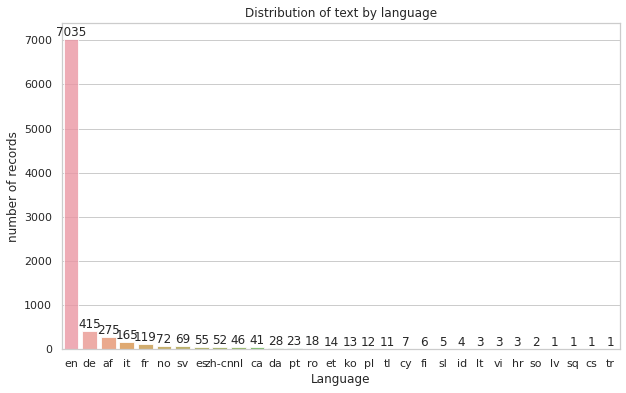

In [ ]:
x = data['Ticket_Language'].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 8.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=e3b7908204ad4d34bea3b4553665e9a7e5de345ff7fa967924c76cf705c9874e
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

#Translate the text to English
# Function to translate the text to english.
def translate_to_en(text,lang ):
  try:
    if lang == 'unknown':
        return text
    else:
        return translator.translate(text).text
  except:
    return text

data['en_Description'] = data.apply(lambda x: translate_to_en(x['Ticket'], x['Ticket_Language']), axis=1)

In [ ]:
data[data['Ticket_Language']!='en']

Short description  \
3                         unable to access hr_tool page   
4                                          skype error    
14                             unable to open payslips    
19                              unable to sign into vpn   
22                             unable to connect to vpn   
25                           erp SID_37 password reset    
29                      unable to log in to erp SID_34    
33                                   ess password reset   
39                           call for ecwtrjnq jpecxuty   
40                       ticket update - inplant_874615   
44                     unable to login to hr_tool etime   
51                           call for ecwtrjnq jpecxuty   
52    vip 2 - i need my password_management_tool pas...   
88                                   unable to open ie    
117                   ticket update on ticket_no0454269   
118                    unable to display expense report   
122                             unable to access mails    
123                    unable to display expense report   
124                            mobile device activation   
127                            update on inplant_874269   
131                                unable to access vpn   
133      install driver in printer hr14 in HostName_769   
140                          prtgghj4k45 password reset   
145             unable to start dell 7350 2 in 1 device   
146                             erp_print_tool install.   
148                            install acrobat standard   
153                                      outlook hangs.   
154                                    vpn not working.   
169                             account unlock request.   
179                      unable to login to erp SID_34    
181                            unable to connect to vpn   
190                              password reset request   
192                                     password reset    
199                           changed desktop wallpaper   
213                                   loud noise // gso   
214                       ess kiosk user password reset   
217                           erp SID_34 account unlock   
220                               adding members to dl    
221             java issue on uacyltoe hxgaycze laptop.   
223                           probleme mit bluescreen .   
227                                   sync emails issue   
229                          call for ecwtrjnq jpecxuty   
231                             unable to view payslips   
255         probleme mit laufwerk z: \laeusvjo fvaihgpx   
259                         unable to login to hr_tool    
265                   netweaver funktioniert nicht mehr   
270      neues passwort für accountname tgryhu hgygrtui   
272                 printer problem / issue information   
284                             unable to log in to ess   
292                                 need password reset   
299           unable to login to collaboration_platform   
302   EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...   
304                  alte eq abholen \wrcktgbd wzrgyunp   
305   probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...   
306                 support für we111\zlqfptjx xnklbfua   
309                      install collaboration_platform   
311                                      ticket update    
316                           erp SID_34 password reset   
330                                 outlook won't open.   
335   dringend : schulungsraum 1 . sprechanlage funk...   
336                            data back up for germany   
339                                    konto gespaerrt.   
349                  install EU_tool \laeusvjo fvaihgpx   
357   EU_tool aktualisierung alle 15 min läuft nicht      
363                kalendereinträge - qdxyifhj zbwtunpy   
365             labeldrucker wk 44567 druckt nicht mehr   
368             daten kann nicht heruntergeladen werden   
369                       

### Notes:
#### While looking at data we find a lot of unnecessary text that have no input for classification.
#### We will try to visually see the patterns to that the text can be cleaned before modelling

## Visualising different patterns 

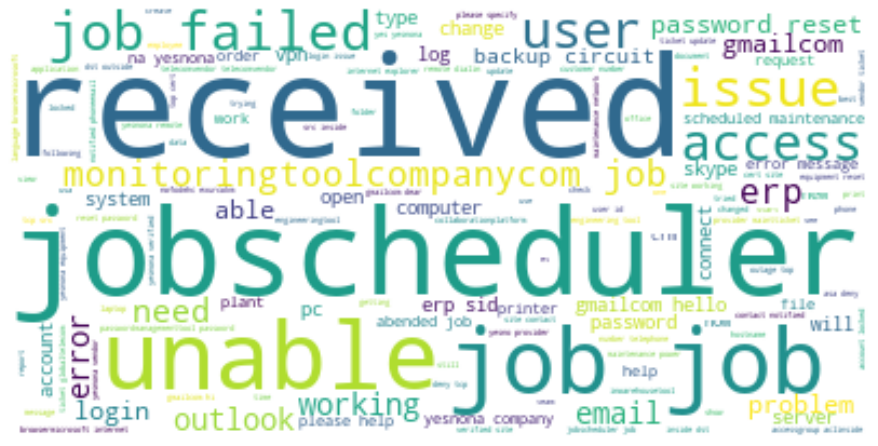

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(i for i in data.en_Description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Again we see a lot of text that does not add any value for our use case e.g. words like 
# 1. hello
# 2. na
# Lets write our own small stopwords relevant to domain to clean data 

In [ ]:
import string 
def clean_data_domainContext(text  ):
    text = re.sub(r"received from:",'',text)
    text = re.sub(r"received:",'',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"this message was sent from an unmonitored email address",'',text)
    text = re.sub(r"email:",' ',text)
    text = re.sub(r"email address:",'',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"sddubject:",'',text)
    text = re.sub(r"please do not reply to this message",' ',text)
    text = re.sub(r"select the following link to view the disclaimer in an alternate language",' ',text)
    text = re.sub(r"description problem",'',text)
    text = re.sub(r"steps taken far",' ',text)
    text = re.sub(r"please do the needful",'',text)
    text = re.sub(r"customer job title",' ',text)
    text = re.sub(r"sales engineer contact",'',text)
    text = re.sub(r"please note that",' ',text)
    text = re.sub(r"please find below",'',text)
    text = re.sub(r"hello",'',text)
    text = re.sub(r"date and time",' ',text)
    text = re.sub(r"kindly refer mail:",'',text)
    text = re.sub(r"name:",' ',text)
    text = re.sub(r"language:",'',text)
    text = re.sub(r"customer number:",' ',text)
    text = re.sub(r"telephone:",'',text)
    text = re.sub(r"summary:",' ',text)
    text = re.sub(r"sincerely",'',text)
    text = re.sub(r"company inc",' ',text)
    text = re.sub(r"hallo",'',text)
    text = re.sub(r"hi it team",' ',text)
    text = re.sub(r"hi team",'',text)
    text = re.sub(r" hi ",'',text)
    text = re.sub(r"best",' ',text)
    text = re.sub(r" na ",' ',text)
    text = re.sub(r" yes ",' ',text)
    text = re.sub(r" kind ",'',text)
    text = re.sub(r" regards ",' ',text)
    text = re.sub(r" good morning ",'',text)
    text = re.sub(r" please ",'',text)
    text = re.sub(r"monitoring_tool@company.com",'MonitoringTool',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text


In [ ]:
data['en_Description'] = data['en_Description'].apply(clean_data_domainContext)

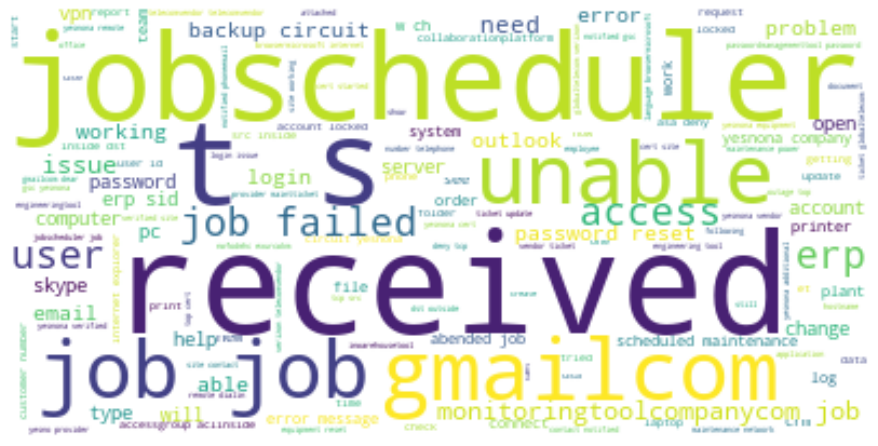

In [ ]:
text = " ".join(i for i in data.en_Description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# There are lot of Stop words that needs to be removed
#Removing Stop words
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence.lower())
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
  
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

In [ ]:
data['en_Description'] = data['en_Description'].apply(lambda x : remove_stopwords(x) )

In [ ]:
# Visualise the word cloud

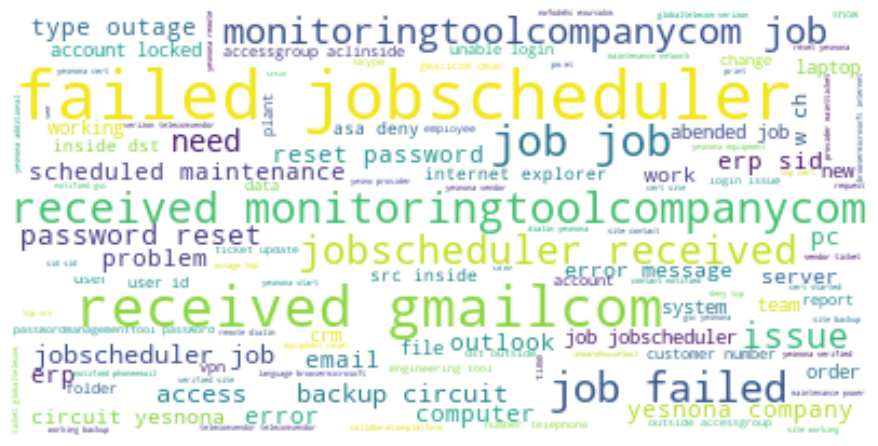

In [ ]:
text = " ".join(i for i in data.en_Description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

## Visualising different text features 

In [ ]:
#Drop Not required columns 
data = data.drop(['Caller' , 'Short description' , 'Description' , 'Caller' , 'Ticket' , 'Ticket_Language' , 'is_en' ],  axis = 1  )

In [ ]:
copydf = data.copy(deep=True)

In [ ]:
data.head()

Assignment group                                     en_Description
0            GRP_0  login issue verified user detailsemployee mana...
1            GRP_0  outlook received gmailcom team meetingsskype m...
2            GRP_0             cant log vpn received gmailcom log vpn
3            GRP_0                          unable access hrtool page
4            GRP_0                                        skype error

In [ ]:
finaldf=data.copy(deep=True)

In [ ]:
# Lemmatise words 
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

finaldf['en_Description'] = finaldf['en_Description'].apply(lemmatize_text)

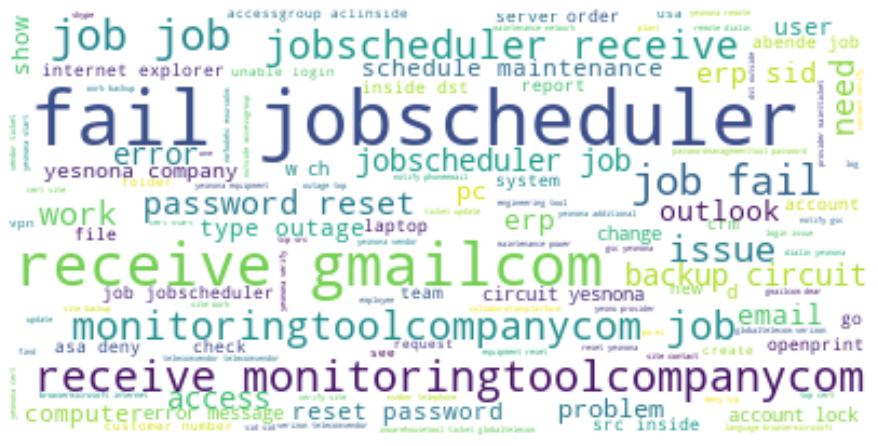

In [ ]:
text = " ".join(i for i in finaldf.en_Description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# First Fetature to visualise is the number of words in ticket 
# If there are very less number of words in ticket it will be very difficult to classify such tickets 
print("The Description")
print("MAX str length          MIN str length ")
print(data['en_Description'].str.len().max(), "                        ", data['en_Description'].str.len().min() )

The Description
MAX str length          MIN str length 
6309                          0


In [ ]:
#number of length in each Ticket
finaldf['length']=[len(text) for text in finaldf['en_Description']]
#number of words in each Ticket
finaldf['len_words'] = finaldf['en_Description'].apply(lambda x: len(x.split(" ")))

In [ ]:
finaldf

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data_cp = finaldf.copy()
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

bins  counts
0    0-100    8391
1  100-300      84
2  300-500      10
3  500-800      14
4     >800       1

Text(0.5, 1.0, 'Word distribution per bin')

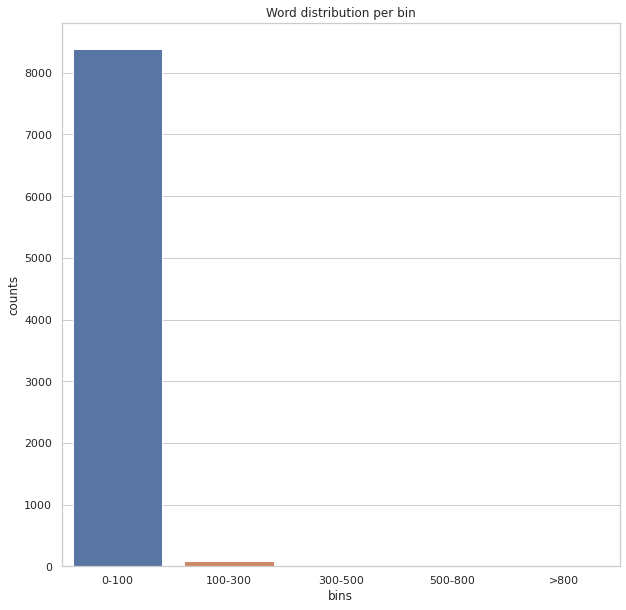

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

### Text preprocessing

In [ ]:
#find duplicates
finaldf.duplicated(subset=['en_Description' , 'Assignment group' ]).sum()
#There are  records which are duplicate

1764

In [ ]:
#remove duplicates
finaldf.drop_duplicates(subset=['en_Description' ,'Assignment group' ] , keep='first' , inplace=True)

In [ ]:
finaldf.shape

(6736, 4)

In [ ]:
#since these single word Decription does not help in predection , we can drop them
finaldf.drop(finaldf[finaldf['len_words'] < 2].index, inplace = True)

In [ ]:
finaldf.shape

(6726, 4)

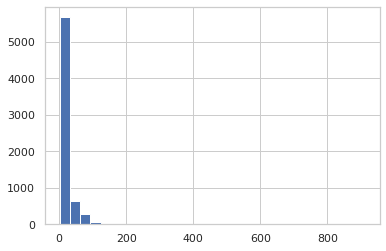

In [ ]:
finaldf['len_words'].hist(bins=30);

In [ ]:
!pip install -q pyLDAvis 

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
#to process the simple_process gensim package as input needed as string 
corpus=finaldf.en_Description.values.tolist()

In [ ]:
corpus[1]

'outlook receive gmailcom team meetingsskype meeting etc appear outlook calendar somebodyadvise correct kind'

In [ ]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

In [ ]:
print(data_words[1])

['outlook', 'receive', 'gmailcom', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebodyadvise', 'correct', 'kind']


In [ ]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

**WordCloud **

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

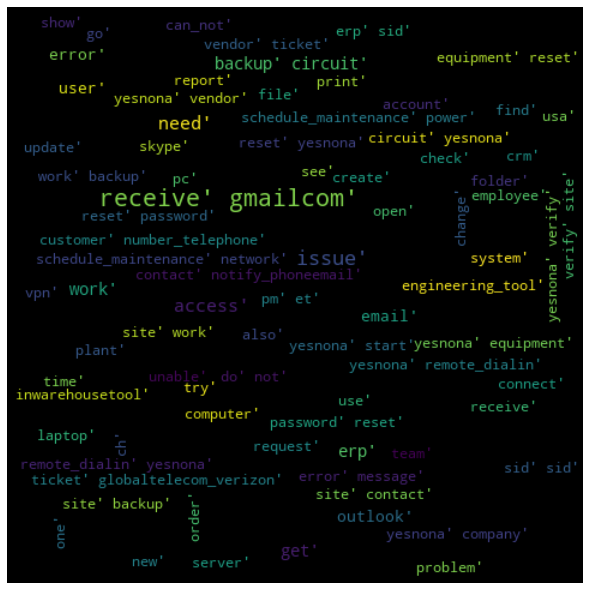

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(8,8),facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

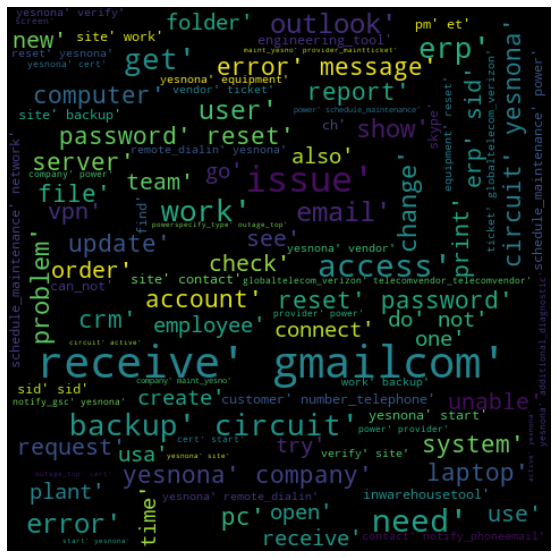

In [ ]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Copying to new dataframe to create wordclouds on target class

new_df = finaldf.copy()
new_df['words'] = data_words_bigrams
new_df

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_12', 'GRP_2', 'GRP_24', 'GRP_19', 'GRP_3',
       'GRP_13', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_29', 'GRP_4', 'GRP_16',
       'GRP_18', 'GRP_6', 'GRP_10', 'GRP_9', 'GRP_31', 'GRP_7', 'GRP_34',
       'GRP_26', 'GRP_5', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30', 'GRP_15',
       'GRP_42', 'GRP_20', 'GRP_17', 'GRP_22', 'GRP_11', 'GRP_45', 'GRP_21',
       'GRP_1', 'GRP_48', 'GRP_62', 'GRP_23', 'GRP_47', 'GRP_27', 'GRP_39',
       'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_60', 'GRP_53', 'GRP_65',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_46', 'GRP_49', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_66', 'GRP_68', 'GRP_63', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [ ]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

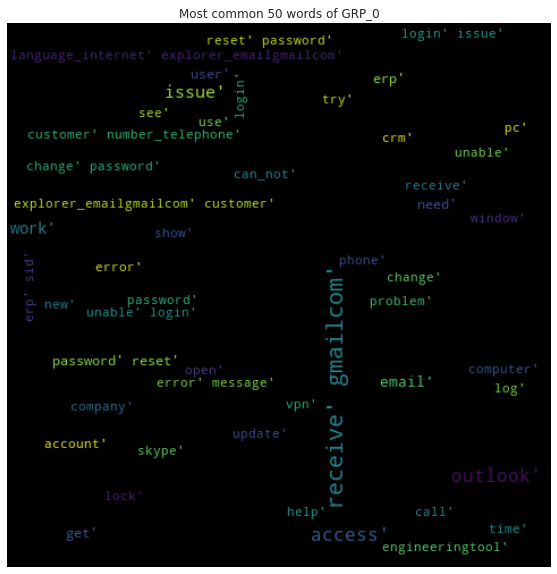

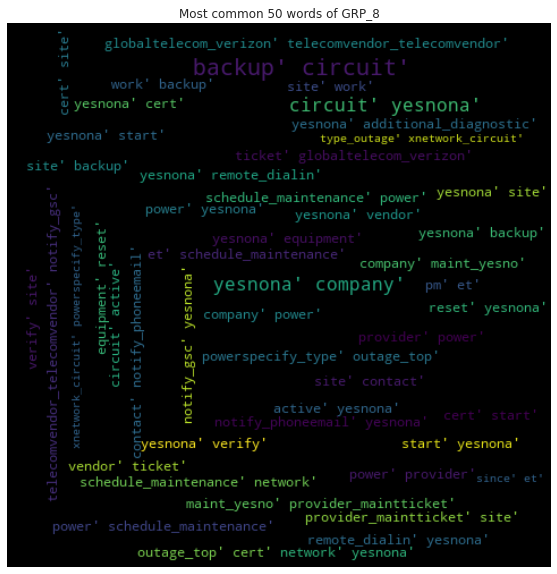

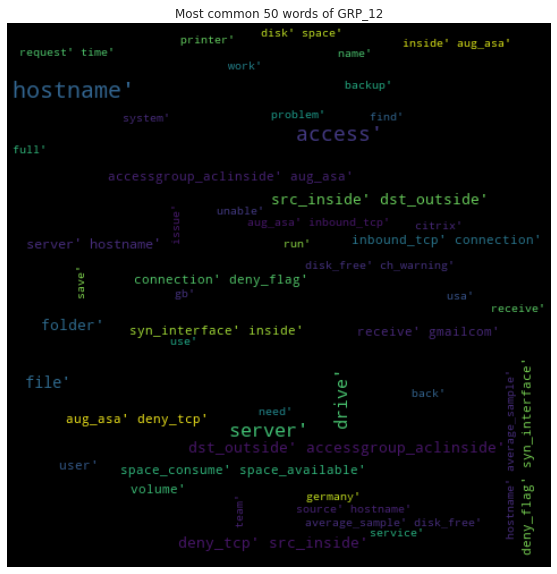

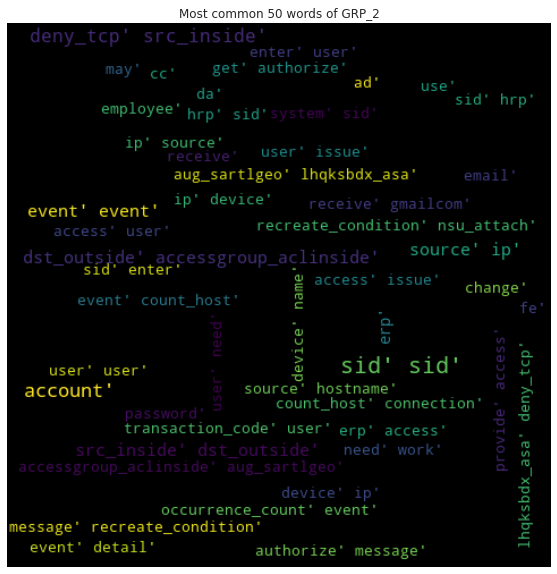

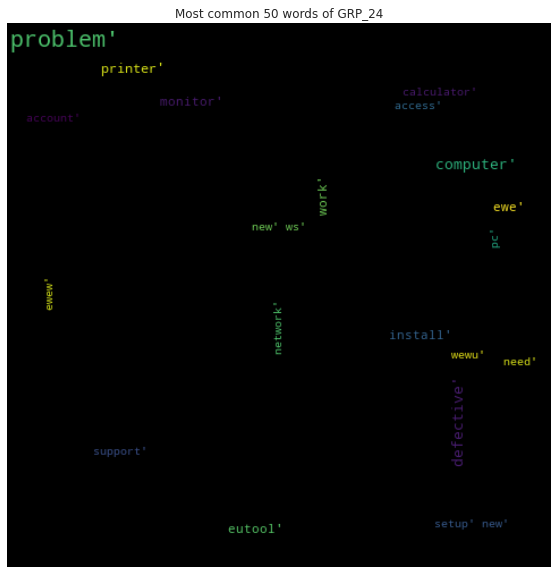

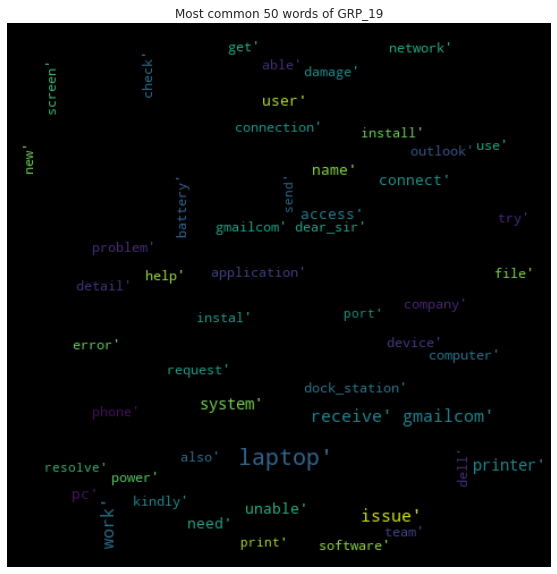

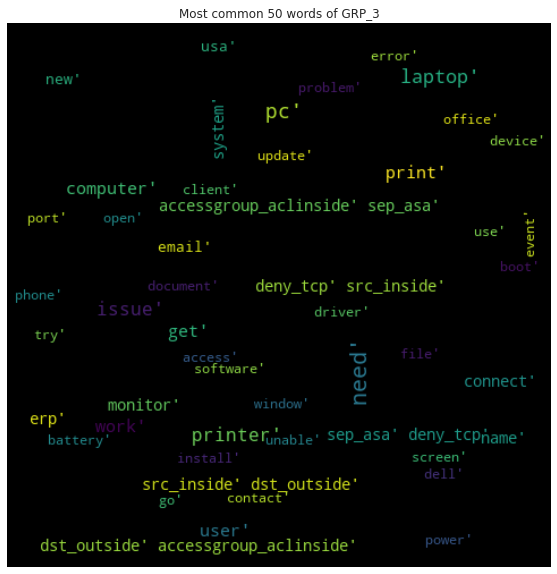

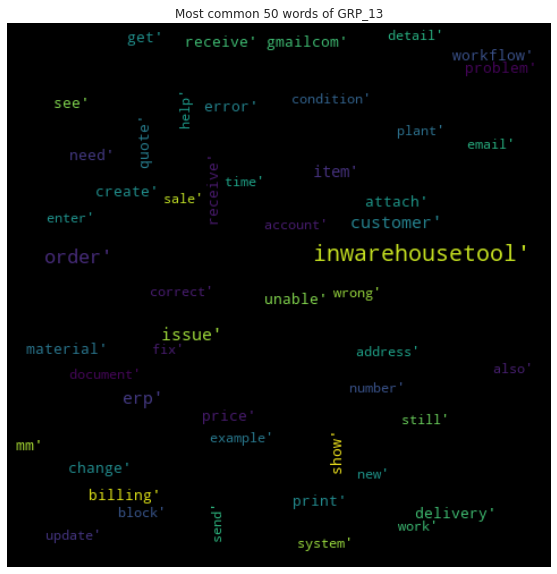

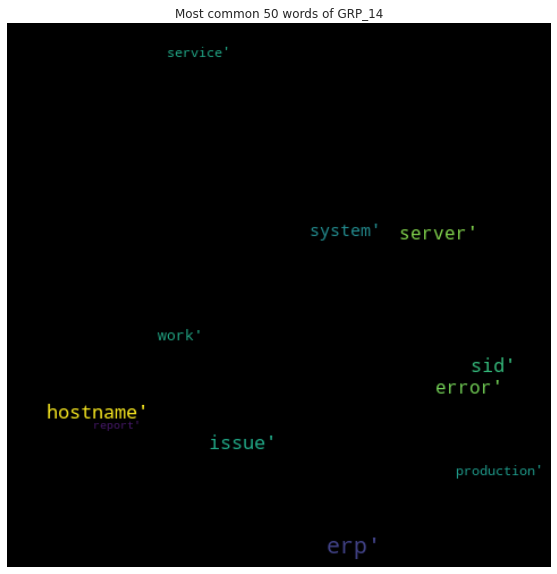

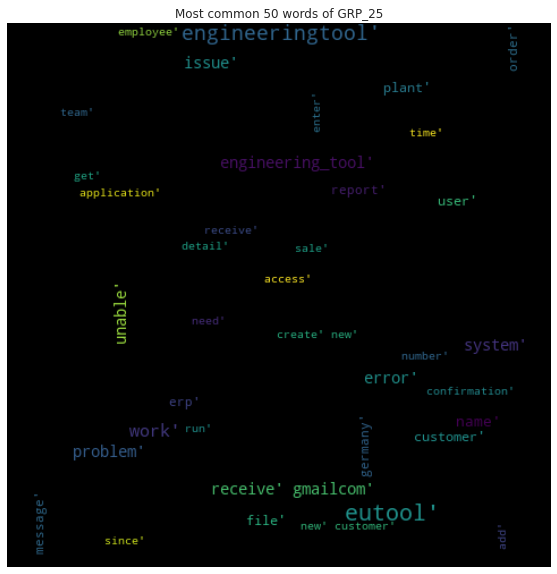

In [ ]:
#for loop to pass the top 10 Assignment groups

for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [ ]:
data_cp = finaldf.copy()

In [ ]:
data_cp.describe().transpose()

count        mean         std  min   25%   50%    75%     max
length     6726.0  160.426851  308.377220  6.0  43.0  99.0  175.0  6217.0
len_words  6726.0   22.141986   43.341417  2.0   6.0  13.0   24.0   910.0

In [ ]:
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

bins  counts
0    0-100    6617
1  100-300      84
2  300-500      10
3  500-800      14
4     >800       1

Text(0.5, 1.0, 'Word distribution per bin')

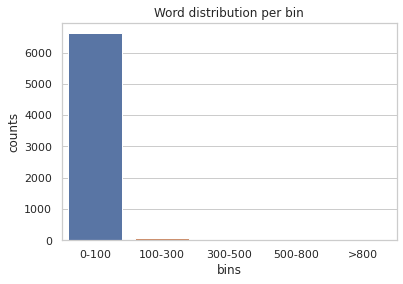

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

Most of the descrption of the problems raised by callers are short with in 0-100 words
Few items are with bit descriptive

In [ ]:
finaldf["Assignment group"].nunique()

74

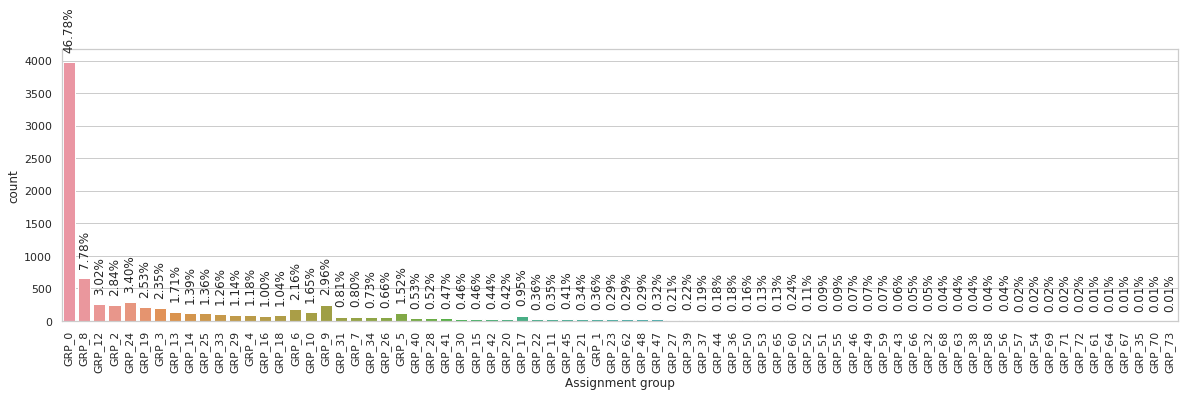

In [ ]:
 #Plot to visualize the percentage data distribution across different groups after preprocessing 
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=finaldf["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

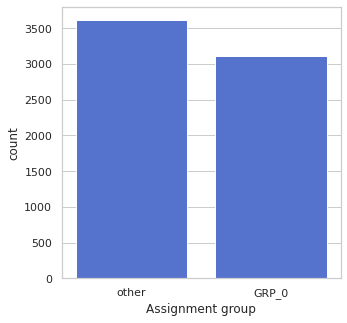

In [ ]:
# Create the Dataset for classifying GRP_0
TicketGRP0DF = finaldf.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

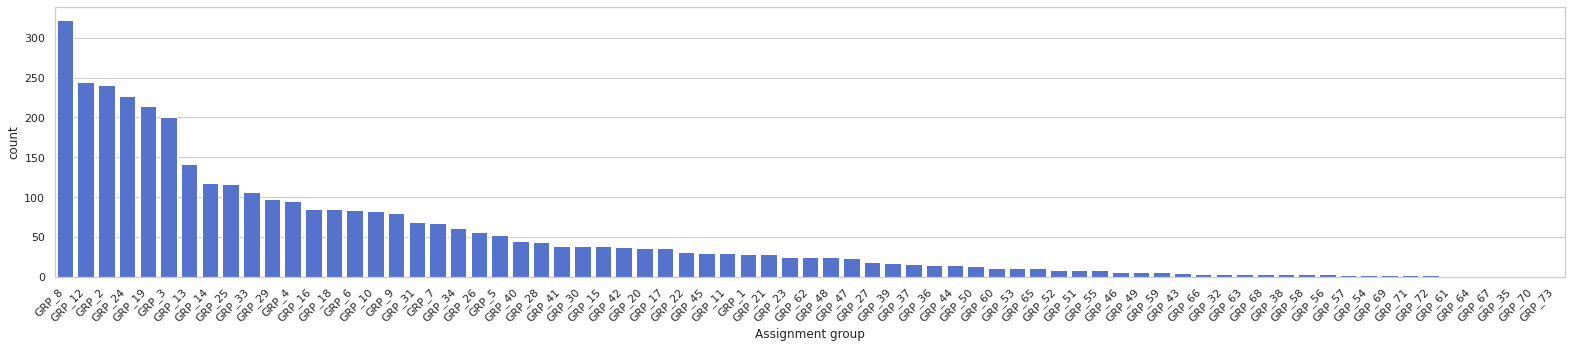

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = finaldf[finaldf['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observation**

There is high imbalance within the other group, For machine learning we can take Assignment Groups where there are more that 15 Samples rest we can combine to form new Group.
If ticket is pridected for new group we can route the ticket for manual classification until we have suifficent data for those groups.

Once we have more data for remaining group we can re-train by including that group . 


In [ ]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts >= 15 ].index)]
print("Groups more than 20 Samples: " , res['Assignment group'].nunique())
res['Assignment group'].value_counts()

Groups more than 20 Samples:  45


GRP_0     3106
GRP_8      323
GRP_12     245
GRP_2      241
GRP_24     227
GRP_19     214
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     106
GRP_29      97
GRP_4       95
GRP_18      85
GRP_16      85
GRP_6       84
GRP_10      82
GRP_9       80
GRP_31      69
GRP_7       68
GRP_34      61
GRP_26      56
GRP_5       52
GRP_40      45
GRP_28      44
GRP_41      39
GRP_30      39
GRP_15      38
GRP_42      37
GRP_17      36
GRP_20      36
GRP_22      31
GRP_11      30
GRP_45      30
GRP_1       28
GRP_21      28
GRP_23      25
GRP_48      25
GRP_62      25
GRP_47      23
GRP_27      18
GRP_39      17
GRP_37      16
GRP_36      15
GRP_44      15
Name: Assignment group, dtype: int64

In [ ]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts < 15 ].index)]
print("Groups less than 15 Samples: " , res['Assignment group'].nunique())
print(res['Assignment group'].value_counts().sum())
res['Assignment group'].value_counts()

Groups less than 15 Samples:  29
134


GRP_50    14
GRP_60    11
GRP_53    11
GRP_65    11
GRP_52     9
GRP_51     8
GRP_55     8
GRP_59     6
GRP_46     6
GRP_49     6
GRP_43     5
GRP_66     4
GRP_32     4
GRP_63     3
GRP_68     3
GRP_38     3
GRP_58     3
GRP_56     3
GRP_72     2
GRP_69     2
GRP_71     2
GRP_54     2
GRP_57     2
GRP_70     1
GRP_35     1
GRP_67     1
GRP_64     1
GRP_61     1
GRP_73     1
Name: Assignment group, dtype: int64

Data from Assignment Group other than GRP_0 is highly unbalanced .

Assignnment Groups with sample more than or equal to 15 are 42.

Assignnment Groups with sample less than 15 are 31, which can be combined as 'GRPL15' form a new Group. Which can be further classified manually currently

Once we collect more data for groups with less sample we can re-train the model with explict groups.

In [ ]:
#Combining Assignment Group for Data with Samples less than 15
grp_lst = res['Assignment group'].unique().tolist()
grp_lst

['GRP_35',
 'GRP_38',
 'GRP_43',
 'GRP_46',
 'GRP_49',
 'GRP_50',
 'GRP_51',
 'GRP_52',
 'GRP_53',
 'GRP_54',
 'GRP_55',
 'GRP_56',
 'GRP_57',
 'GRP_58',
 'GRP_59',
 'GRP_60',
 'GRP_61',
 'GRP_32',
 'GRP_63',
 'GRP_64',
 'GRP_65',
 'GRP_66',
 'GRP_67',
 'GRP_68',
 'GRP_69',
 'GRP_70',
 'GRP_71',
 'GRP_72',
 'GRP_73']

In [ ]:
#Create the copy on dataset to update new column values
u_data = finaldf.copy()

In [ ]:
u_data["Assignment group"] = u_data["Assignment group"].apply(lambda x : 'GRP_MANUAL' if x in grp_lst  else x)

In [ ]:
u_data["Assignment group"].value_counts()

GRP_0         3106
GRP_8          323
GRP_12         245
GRP_2          241
GRP_24         227
GRP_19         214
GRP_3          200
GRP_13         142
GRP_MANUAL     134
GRP_14         118
GRP_25         116
GRP_33         106
GRP_29          97
GRP_4           95
GRP_18          85
GRP_16          85
GRP_6           84
GRP_10          82
GRP_9           80
GRP_31          69
GRP_7           68
GRP_34          61
GRP_26          56
GRP_5           52
GRP_40          45
GRP_28          44
GRP_30          39
GRP_41          39
GRP_15          38
GRP_42          37
GRP_20          36
GRP_17          36
GRP_22          31
GRP_11          30
GRP_45          30
GRP_1           28
GRP_21          28
GRP_48          25
GRP_23          25
GRP_62          25
GRP_47          23
GRP_27          18
GRP_39          17
GRP_37          16
GRP_44          15
GRP_36          15
Name: Assignment group, dtype: int64

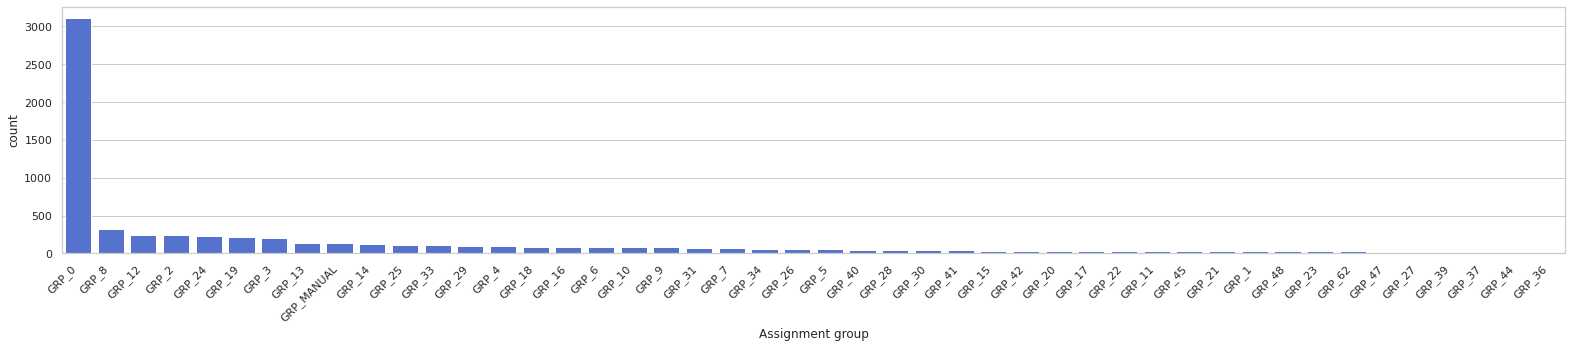

In [ ]:
descending_order = u_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=u_data, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
maxOthers = u_data['Assignment group'].value_counts().max()
maxOthers = 323

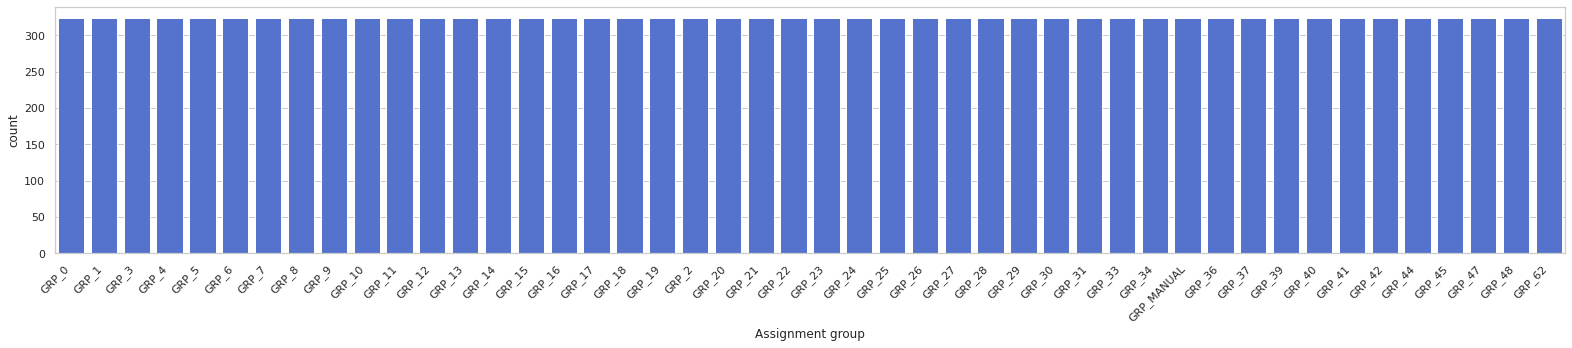

In [ ]:
from sklearn.utils import resample
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
itTicketDF_resampled = u_data[0:0]
for grp in u_data['Assignment group'].unique():
    itTicketGrpDF = u_data[u_data['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

Prepare data for Machine learning Model 1.1

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Get indices for words


In [ ]:
import os
embeddings_index = {}
f = open(os.path.join('/content/drive/MyDrive/Colab Notebooks/glove_6B/', 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
# prepare target
def prepare_targets(y_in , nclasses):
	le = LabelEncoder()
	le.fit(y_in)
	y_enc = le.transform(y_in)
	labels = to_categorical(y_enc , num_classes=nclasses)
	return labels

In [ ]:
itTicketDF_resampled.head()

Assignment group                                     en_Description  \
3406            GRP_0                                  unable connect tc   
2824            GRP_0  account lock issue since last two day account ...   
4684            GRP_0  password wothyehre receive gmailcom wothyehre ...   
8464            GRP_0  sid log issue receive gmailcom could log sid u...   
5801            GRP_0                        need mapadd network printer   

      length  len_words  
3406      17          3  
2824      75         14  
4684      83         11  
8464      92         13  
5801      27          4

In [ ]:
itTicketDF_resampled.describe()

length     len_words
count  14858.000000  14858.000000
mean     193.116772     26.664558
std      382.120442     50.693295
min        8.000000      2.000000
25%       69.000000     10.000000
50%      117.000000     16.000000
75%      205.000000     28.000000
max     6217.000000    910.000000

In [ ]:
len_words_2 = 50
max_features = 10000

In [ ]:
feature_tokenizer_2 = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
feature_tokenizer_2.fit_on_texts(itTicketDF_resampled['en_Description'].astype('str'))
X_2 = feature_tokenizer_2.texts_to_sequences(itTicketDF_resampled['en_Description'].astype('str'))
print("Number of Samples in X:", len(X_2))       
print(X_2[0])

Number of Samples in X: 14858
[34, 111, 5891]


In [ ]:
X_2 = pad_sequences(X_2, maxlen = len_words_2, padding='post')

In [ ]:
#Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary
num_words_text_2 = len(feature_tokenizer_2.word_index) + 1
print(num_words_text_2)
words_to_index_2 = feature_tokenizer_2.word_index

9757


In [ ]:
word_index_2 = feature_tokenizer_2.word_index
print('Found %s unique tokens.' % len(word_index_2))

Found 9756 unique tokens.


In [ ]:
num_words_2 = min(max_features, len(word_index_2)) + 1
print(num_words_2)

embedding_dim_2 = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix_2 = np.zeros((num_words_2, embedding_dim_2))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index_2.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix_2[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix_2[i] = np.random.randn(embedding_dim_2)

9757


In [ ]:
class_2 = itTicketDF_resampled['Assignment group'].nunique()
class_2

46

In [ ]:
y_2= prepare_targets(itTicketDF_resampled['Assignment group'] , class_2)
y_2.shape

(14858, 46)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2, test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_2.shape, y_train_2.shape)
print('Test', X_test_2.shape, y_test_2.shape)

Train (9954, 50) (9954, 46)
Test (4904, 50) (4904, 46)


In [ ]:
model_2 = Sequential()
model_2.add(Embedding(num_words_2, 300, weights=[embedding_matrix_2], input_length=len_words_2,  trainable=False))
model_2.add(Bidirectional(LSTM(units=20)))
model_2.add(Dense(40, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(20))
model_2.add(Dense(46, activation='softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           2927100   
                                                                 
 bidirectional (Bidirectiona  (None, 40)               51360     
 l)                                                              
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 46)                966       
                                                        

In [ ]:
from keras.callbacks import EarlyStopping
#opt = Adam(learning_rate=0.001)
model_2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])
my_callbacks_2 = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model_2.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
X_test_2.shape

(4904, 50)

In [ ]:
history_2 = model_2.fit(X_train_2, y_train_2,  epochs=20, batch_size=32,  callbacks=my_callbacks_2,  validation_data=(X_test_2, y_test_2))

Epoch 1/20
312/312 [==============================] - 20s 49ms/step - loss: 3.3985 - acc: 0.1479 - val_loss: 2.5607 - val_acc: 0.3636
Epoch 2/20
312/312 [==============================] - 14s 46ms/step - loss: 2.3112 - acc: 0.3787 - val_loss: 1.7386 - val_acc: 0.5573
Epoch 3/20
312/312 [==============================] - 14s 45ms/step - loss: 1.7442 - acc: 0.5056 - val_loss: 1.3221 - val_acc: 0.6627
Epoch 4/20
312/312 [==============================] - 15s 47ms/step - loss: 1.4194 - acc: 0.5903 - val_loss: 1.0917 - val_acc: 0.7314
Epoch 5/20
312/312 [==============================] - 14s 45ms/step - loss: 1.2109 - acc: 0.6454 - val_loss: 0.9385 - val_acc: 0.7706
Epoch 6/20
312/312 [==============================] - 15s 47ms/step - loss: 1.0282 - acc: 0.6991 - val_loss: 0.8245 - val_acc: 0.7971
Epoch 7/20
312/312 [==============================] - 15s 47ms/step - loss: 0.9073 - acc: 0.7299 - val_loss: 0.7589 - val_acc: 0.8177
Epoch 8/20
312/312 [==============================] - 14s 45ms

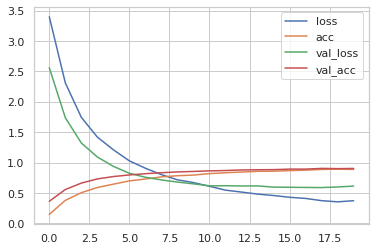

In [ ]:
# display loss curve
pd.DataFrame(history_2.history).plot()

In [ ]:
# evaluate model
model_2.evaluate(X_test_2,y_test_2,verbose = True)

154/154 [==============================] - 2s 14ms/step - loss: 0.6138 - acc: 0.9038


[0.6137849688529968, 0.9037520289421082]

fastText classifier to classify Tickets

fastText is an open-source library, developed by the Facebook AI Research lab. Its main focus is on achieving scalable solutions for the tasks of text classification and representation while processing large datasets quickly and accurately. 

fastText expects the category first, with the prefix ‘label’ before each category, and then the input text

Install FastText

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip
%cd fastText-0.2.0
!make

--2022-08-07 03:56:15--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/0.2.0 [following]
--2022-08-07 03:56:16--  https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/0.2.0
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip’

0.2.0.zip               [   <=>              ]   4.10M  7.25MB/s    in 0.6s    

2022-08-07 03:56:17 (7.25 MB/s) - ‘0.2.0.zip’ saved [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
   creating: fastText-0.2.0/
   creating: fastText-0.2.0/.circleci/
  i

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 2.8 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3166263 sha256=b63ab4216622e197946191b3515e089696625c13ca5365488eb32f70f1daabd7
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
# NLP Preprocessing
from gensim.utils import simple_preprocess

In [ ]:
fasttextdata = itTicketDF_resampled.copy()

In [ ]:
fasttextdata.head()

Assignment group                                     en_Description  \
3406            GRP_0                                  unable connect tc   
2824            GRP_0  account lock issue since last two day account ...   
4684            GRP_0  password wothyehre receive gmailcom wothyehre ...   
8464            GRP_0  sid log issue receive gmailcom could log sid u...   
5801            GRP_0                        need mapadd network printer   

      length  len_words  
3406      17          3  
2824      75         14  
4684      83         11  
8464      92         13  
5801      27          4

In [ ]:
fasttextdata.drop(['length' , 'len_words'] , axis=1 , inplace=True)

In [ ]:
# NLP Preprocess
#to discard any tokens shorter than min_len=2 characters.
fasttextdata['en_Description'] = fasttextdata['en_Description'].apply(lambda x: ' '.join(simple_preprocess(x)))

In [ ]:
# Prefixing each row of the category column with '__label__'
fasttextdata['Assignment group'] = fasttextdata['Assignment group'].apply(lambda x: '__label__' + x)

In [ ]:
fasttextdata.head()

Assignment group                                     en_Description
3406   __label__GRP_0                                  unable connect tc
2824   __label__GRP_0  account lock issue since last two day account ...
4684   __label__GRP_0  password wothyehre receive gmailcom wothyehre ...
8464   __label__GRP_0  sid log issue receive gmailcom could log sid u...
5801   __label__GRP_0                        need mapadd network printer

**Training & Evaluation**
After saving our DataFrames as text files, the next step is training and testing our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fasttextdata['en_Description'], fasttextdata['Assignment group'], stratify=fasttextdata['Assignment group'], test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (9954,) (9954,)
Test (4904,) (4904,)


In [ ]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

In [ ]:
df_train.head()

en_Description Assignment group
6677  job fail jobscheduler receive job fail jobsche...   __label__GRP_6
8128  multiple process show hostnamehanasid since pm...  __label__GRP_14
819   industrial receive gmailcom good afternoon you...  __label__GRP_16
772         pls help run dn sto pcscustom need urgently   __label__GRP_6
7588      monitor light monitor show image turn morning  __label__GRP_30

In [ ]:
import csv
# Saving the CSV file as a text file to train/test the classifier
df_train[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

df_test[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

In [ ]:
# Training the fastText classifier
model = fasttext.train_supervised('/content/drive/MyDrive/Colab Notebooks/train.txt', wordNgrams = 2 ,  lr=1.0, epoch=25)

In [ ]:
# Evaluating performance on the entire test file
model.test('/content/drive/MyDrive/Colab Notebooks/train.txt')  

(9954, 0.9871408479003416, 0.9871408479003416)

In [ ]:
#Save Model
model.save_model("/content/drive/MyDrive/Colab Notebooks/model_filename.bin")

In [ ]:
#Retrive Model
fasttextmodel = fasttext.load_model("/content/drive/MyDrive/Colab Notebooks/model_filename.bin")

In [ ]:
df_test.iloc[5]

en_Description      can not turn system can not turn
Assignment group                     __label__GRP_30
Name: 5149, dtype: object

In [ ]:
# Predicting on a single input
fasttextmodel.predict(df_test.iloc[5, 0])

(('__label__GRP_30',), array([0.99978679]))

In [ ]:
# ML Modelling

In [170]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [173]:
df_itTicket = itTicketDF_resampled[itTicketDF_resampled['Assignment group'].map(itTicketDF_resampled['Assignment group'].value_counts()) > 100]
x = df_itTicket['en_Description']
y = df_itTicket['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y)

In [174]:
cnames=["Classifier", "Accuracy", "f1_score","Precision", "Recall"]
log = pd.DataFrame(columns=cnames, dtype=object)

In [176]:
from sklearn.feature_extraction.text import CountVectorizer

In [177]:
##Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [179]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
log_cols=["Classifier", "Accuracy", "f1_score","Precision", "Recall"]
predictions = nb.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


accuracy 0.8462314939434724
f1 score 0.8570002090116967
logloss: 1.129 
Precision: 0.851
Recall: 0.846
              precision    recall  f1-score   support

           0       0.43      0.15      0.23        65
           1       0.92      0.92      0.92        65
           2       0.90      0.83      0.86        65
           3       0.83      1.00      0.91        64
           4       0.82      0.36      0.50        64
           5       0.83      0.77      0.80        64
           6       0.86      0.77      0.81        64
           7       0.86      1.00      0.93        64
           8       0.85      0.97      0.91        65
           9       0.82      1.00      0.90        65
          10       0.87      0.85      0.86        65
          11       0.82      0.62      0.70        65
          12       0.76      0.58      0.66        65
          13       0.92      0.91      0.91        65
          14       0.90      1.00      0.95        64
          15       0.85      1.0

In [190]:
MultinomialNB = pd.DataFrame([["MultinomialNB",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

In [191]:
##Linear Support Vector Machine
from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42))),
               ])
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(loss='hinge',
                                                         random_state=42)))])

In [192]:
y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

LinearSVC = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

accuracy 0.9229475100942126
f1 score 0.9286504362986348
logloss: 1.129 
Precision: 0.922
Recall: 0.923
              precision    recall  f1-score   support

           0       0.69      0.17      0.27        65
           1       0.94      1.00      0.97        65
           2       0.90      0.98      0.94        65
           3       0.97      1.00      0.98        64
           4       0.79      0.81      0.80        64
           5       1.00      0.89      0.94        64
           6       0.91      0.81      0.86        64
           7       0.93      1.00      0.96        64
           8       0.97      0.97      0.97        65
           9       0.94      1.00      0.97        65
          10       0.94      0.91      0.92        65
          11       0.93      0.83      0.88        65
          12       0.81      0.77      0.79        65
          13       0.97      0.95      0.96        65
          14       0.98      1.00      0.99        64
          15       0.98      1.0

In [193]:
##SGD Classifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [194]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))


SGDClassifier = pd.DataFrame([["SGDClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

accuracy 0.8596904441453567
f1 score 0.8738537102931756
logloss: 1.129 
Precision: 0.856
Recall: 0.860
              precision    recall  f1-score   support

           0       0.50      0.05      0.08        65
           1       0.84      1.00      0.92        65
           2       0.85      0.86      0.85        65
           3       0.90      1.00      0.95        64
           4       0.82      0.48      0.61        64
           5       0.94      0.75      0.83        64
           6       0.86      0.77      0.81        64
           7       0.88      1.00      0.93        64
           8       0.87      0.94      0.90        65
           9       0.82      1.00      0.90        65
          10       0.89      0.77      0.83        65
          11       0.85      0.52      0.65        65
          12       0.80      0.57      0.67        65
          13       0.95      0.86      0.90        65
          14       0.94      1.00      0.97        64
          15       0.94      0.9

In [195]:
##Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [196]:
y_pred = logreg.predict(X_test)
predictions = logreg.predict_proba(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

LogisticRegression = pd.DataFrame([["LogisticRegression",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

accuracy 0.9441453566621804
f1 score 0.9460203286770523
logloss: 0.478 
Precision: 0.943
Recall: 0.944
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        65
           1       0.96      1.00      0.98        65
           2       0.97      0.98      0.98        65
           3       0.98      1.00      0.99        64
           4       0.88      0.81      0.85        64
           5       0.91      0.95      0.93        64
           6       0.93      0.88      0.90        64
           7       0.98      1.00      0.99        64
           8       0.94      0.97      0.95        65
           9       1.00      1.00      1.00        65
          10       0.98      0.94      0.96        65
          11       0.82      0.82      0.82        65
          12       0.79      0.75      0.77        65
          13       1.00      0.95      0.98        65
          14       1.00      1.00      1.00        64
          15       1.00      1.0

In [197]:
##Xgboost
import xgboost as xgb

xgboost = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)),
               ])
xgboost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.8, max_depth=7,
                               n_estimators=200, nthread=10,
                               objective='multi:softprob', subsample=0.8))])

In [198]:
y_pred = xgboost.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

xgb = pd.DataFrame([["Xgboost",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

accuracy 0.9424629878869448
f1 score 0.9445232219157074
logloss: 0.478 
Precision: 0.940
Recall: 0.942
              precision    recall  f1-score   support

           0       0.64      0.43      0.51        65
           1       0.96      1.00      0.98        65
           2       0.92      0.94      0.93        65
           3       0.98      1.00      0.99        64
           4       0.82      0.88      0.85        64
           5       0.98      0.94      0.96        64
           6       0.95      0.91      0.93        64
           7       0.98      1.00      0.99        64
           8       0.95      0.97      0.96        65
           9       1.00      1.00      1.00        65
          10       1.00      0.95      0.98        65
          11       0.90      0.83      0.86        65
          12       0.83      0.75      0.79        65
          13       0.98      0.95      0.97        65
          14       0.98      1.00      0.99        64
          15       1.00      1.0

In [199]:
#Random Forest Scikit
import sklearn
print(sklearn.__version__)

1.0.2


In [200]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [201]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('accuracy %s' % accuracy_score(y_pred, y_test)) 
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

RandomForestClassifier = pd.DataFrame([["RandomForest",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

accuracy 0.9424629878869448
f1 score 0.9445232219157074
logloss: 0.478 
Precision: 0.940
Recall: 0.942
              precision    recall  f1-score   support

           0       0.64      0.43      0.51        65
           1       0.96      1.00      0.98        65
           2       0.92      0.94      0.93        65
           3       0.98      1.00      0.99        64
           4       0.82      0.88      0.85        64
           5       0.98      0.94      0.96        64
           6       0.95      0.91      0.93        64
           7       0.98      1.00      0.99        64
           8       0.95      0.97      0.96        65
           9       1.00      1.00      1.00        65
          10       1.00      0.95      0.98        65
          11       0.90      0.83      0.86        65
          12       0.83      0.75      0.79        65
          13       0.98      0.95      0.97        65
          14       0.98      1.00      0.99        64
          15       1.00      1.0

In [202]:
# KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [205]:
y_pred = classifier.predict(X_test)

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87  7]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.93      0.92      0.93       106

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [207]:
KNeighborsClassifier = pd.DataFrame([["KNeighborsClassifier",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='micro'),precision_score(y_test, y_pred,average='micro'),recall_score(y_test, y_pred,average='micro')]], columns=log_cols)

In [208]:
log=pd.concat([MultinomialNB, LinearSVC, SGDClassifier, LogisticRegression, xgb, RandomForestClassifier, KNeighborsClassifier],axis=0)
print(log)

             Classifier  Accuracy  f1_score  Precision    Recall
0         MultinomialNB  0.846231  0.846231   0.846231  0.846231
0             LinearSVC  0.922948  0.922948   0.922948  0.922948
0         SGDClassifier  0.859690  0.859690   0.859690  0.859690
0    LogisticRegression  0.944145  0.944145   0.944145  0.944145
0               Xgboost  0.942463  0.942463   0.942463  0.942463
0          RandomForest  0.942463  0.942463   0.942463  0.942463
0  KNeighborsClassifier  0.925000  0.925000   0.925000  0.925000


In [209]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

Accuracy  f1_score  Precision    Recall
Classifier                                                   
MultinomialNB         0.846231  0.846231   0.846231  0.846231
SGDClassifier         0.859690  0.859690   0.859690  0.859690
LinearSVC             0.922948  0.922948   0.922948  0.922948
KNeighborsClassifier  0.925000  0.925000   0.925000  0.925000
Xgboost               0.942463  0.942463   0.942463  0.942463
RandomForest          0.942463  0.942463   0.942463  0.942463
LogisticRegression    0.944145  0.944145   0.944145  0.944145

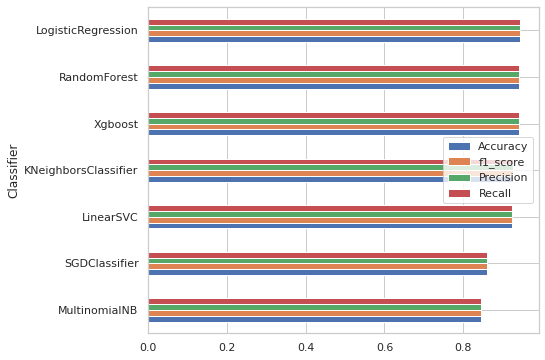

In [210]:
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])